# Hospital Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the dataset

Health_data = pd.read_csv(r"C:\Users\Nkiru\Documents\Healthcare data analyst\Health Dataset Python\Health_dataset.csv")
Health_data

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28
...,...,...,...,...,...,...,...,...,...,...
7995,PAT-07996,Male,HIV/AIDS,Radiotherapy,Sunrise Clinic,2022-06-28,2022-07-05,Recovered,NaN,1925-11-10
7996,PAT-07997,Female,Heart Disease,Chemotherapy,Sunrise Clinic,2022-01-28,2022-02-25,Recovered,NaN,2004-06-15
7997,PAT-07998,Male,Asthma,Dialysis,Sunrise Clinic,2022-09-14,2022-09-22,Recovered,NaN,1993-10-03
7998,PAT-07999,Male,Typhoid,Ventilation Support,Sunrise Clinic,2023-08-04,2023-08-25,Recovered,NaN,1999-02-01


### What is the Total Number of Patients?

In [5]:
# Count numbers of patients

total_records = Health_data.shape[0]

print("Total Patients =", total_records)

Total Patients = 8000


### What is the Patients Polulation Distribution by Gender?

In [9]:
# Count of Patients Population Distribution by Gender

gender_count = Health_data['Gender'].value_counts()
print("Distribution by", gender_count)

Distribution by Gender
Male      5206
Female    2794
Name: count, dtype: int64


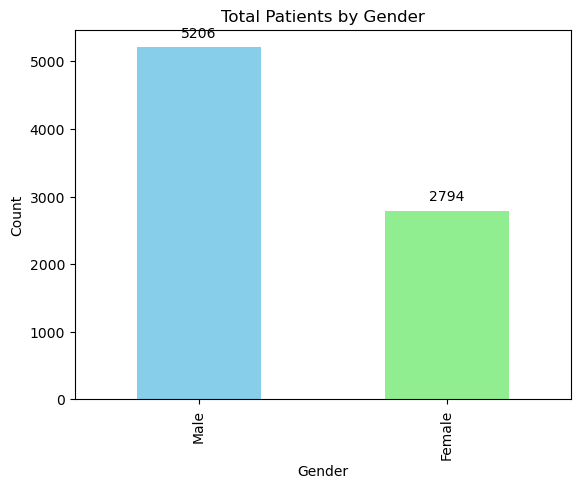

In [13]:
# Creat bar chart

ax=gender_count.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.ylabel("Count")
plt.title("Total Patients by Gender")


#Label part
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0,5),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

plt.show()

### Patient's Age-group by Total Visit

Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64

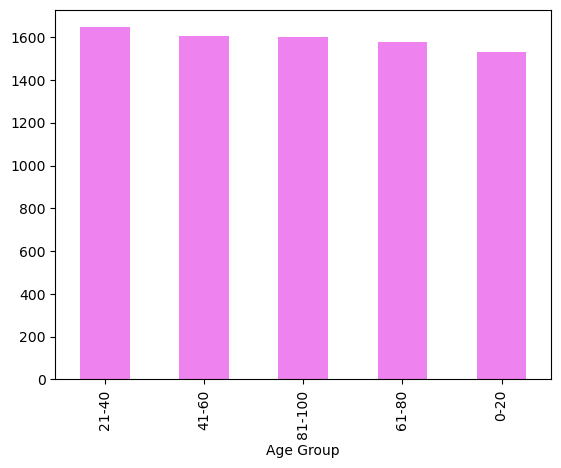

In [23]:
# Patient's Age-group by Total Visis

# Convert the Admission Date and Date of Birth to proper date format
Health_data['Admission Date'] = pd.to_datetime(Health_data['Admission Date'])
Health_data['Date of Birth'] = pd.to_datetime(Health_data['Date of Birth'])

# Calculate the patients age as of the timd of Admission in year
Health_data['Age'] = (Health_data['Admission Date'] - Health_data['Date of Birth']).dt.days / 365.25
Health_data['Age'] = Health_data['Age'].astype(int)

# Count number of Patients using Age bins
bins = [0,20,40,60,80,100]
labels= ['0-20', '21-40', '41-60', '61-80', '81-100']

Health_data['Age Group'] = pd.cut(Health_data['Age'], bins=bins, labels=labels, right=False)

age_count = Health_data['Age Group'].value_counts()

# Create a bar chart

ax = age_count.plot(kind='bar', color='violet')

age_count

### Which diseases are most commonly diagnosed among the patients?

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Diabetes         694
Cancer           691
Name: count, dtype: int64

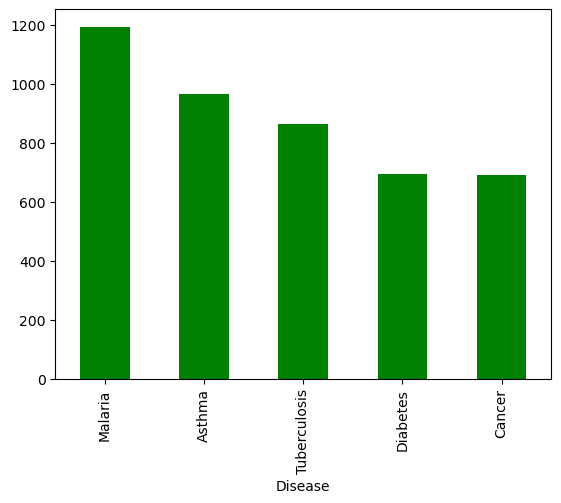

In [32]:
# Count diseases and create a bar chart of top 5

disease_counts = Health_data['Disease'].value_counts().nlargest(5)
ax = disease_counts.plot(kind = 'bar', color = 'green')
disease_counts

In [35]:
disease_counts = Health_data['Disease'].value_counts().nlargest(5)
total_top5 = disease_counts.sum()
format_value ="{:,}".format(total_top5)
print("Total count of the 5 most common diseases =", format_value)

Total count of the 5 most common diseases = 4,408


In [38]:
# Using dynamictop

dynamictop = 7
disease_counts = Health_data['Disease'].value_counts().nlargest(dynamictop)
total_top = disease_counts.sum()
format_value ="{:,}".format(total_top)
description = f"Total count of the {dynamictop} most common diseases ="
print(description, format_value)

Total count of the 7 most common diseases = 5,655


In [41]:
#Calculate the top 3 percentage

disease_counttop5 = Health_data['Disease'].value_counts().nlargest(5)
total_diseases_count =  Health_data['Disease'].value_counts().sum()
percentage = (disease_counttop5/total_diseases_count) * 100
round_percentage = percentage.round(0).astype(int)
round_percentage

Disease
Malaria         15
Asthma          12
Tuberculosis    11
Diabetes         9
Cancer           9
Name: count, dtype: int32

In [45]:
disease_counttop5 = Health_data['Disease'].value_counts().nlargest(5)
total_diseases_count =  Health_data['Disease'].value_counts().sum()
percentage = (disease_counttop5/total_diseases_count) * 100
round_percentage = percentage.round(0).astype(int)

for disease, pct in round_percentage.items():
    print(f"{disease}: {pct}%")

Malaria: 15%
Asthma: 12%
Tuberculosis: 11%
Diabetes: 9%
Cancer: 9%


In [47]:
disease_counttop5 = Health_data['Disease'].value_counts().nlargest(5)
total_diseasestop5count =  disease_counttop5.sum()


pcttop3 = (disease_counttop5/total_diseasestop5count) * 100
round_percentage = pcttop3.round(0).astype(int)

for disease, pcttop3 in round_percentage.items():
    print(f"{disease}: {pcttop3}%")

Malaria: 27%
Asthma: 22%
Tuberculosis: 20%
Diabetes: 16%
Cancer: 16%


### Are certain diseases more prevalent in one gender compared to the other?

In [48]:
gender_disease = pd.crosstab(Health_data['Disease'], Health_data['Gender'])
print("Diseases that are common among genders")
gender_disease

Diseases that are common among genders


Gender,Female,Male
Disease,,
Asthma,320,646
COVID-19,53,104
Cancer,239,452
Dengue,27,42
Diabetes,256,438
HIV/AIDS,155,333
Heart Disease,206,361
Hypertension,65,108
Kidney Failure,182,293
